In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
y, sr = librosa.load('/content/drive/MyDrive/nazad/log_nazad_1.csv', mono=True, duration=5)

In [ ]:
sr

22050

In [ ]:
filename = '/content/drive/MyDrive/nazad/log_nazad_1.csv'
df_4 = pd.read_csv(filename, sep=',')
df_4 = df_4.drop('EVENT_MARKER', axis=1)

In [ ]:
filename = '/content/log_nazad_11.csv'
df_4 = pd.read_csv(filename, sep=',')
df_4 = df_4.drop('EVENT_MARKER', axis=1)

In [ ]:
filename = '/content/log_shym_20.csv'
df_4 = pd.read_csv(filename, sep=',')
df_4 = df_4.drop('EVENT_MARKER', axis=1)

In [ ]:
df_4['TIMESTAMP'] = (df_4['TIMESTAMP'] - df_4['TIMESTAMP'][0])/10**9

In [ ]:
df_4

,CH_0,TIMESTAMP
2655,152,0.193062
2656,152,0.193062
2657,152,0.193062
2658,152,0.193062
2659,152,0.193062
...,...,...
7898,153,2.814498
7899,153,2.814498
7900,152,2.814498
7901,153,2.814498


In [ ]:
indices_to_drop = df_4[df_4['TIMESTAMP'] <= 0.1].index
df_4 = df_4.drop(indices_to_drop, axis=0)

CPU times: user 23.6 ms, sys: 0 ns, total: 23.6 ms
Wall time: 26.7 ms


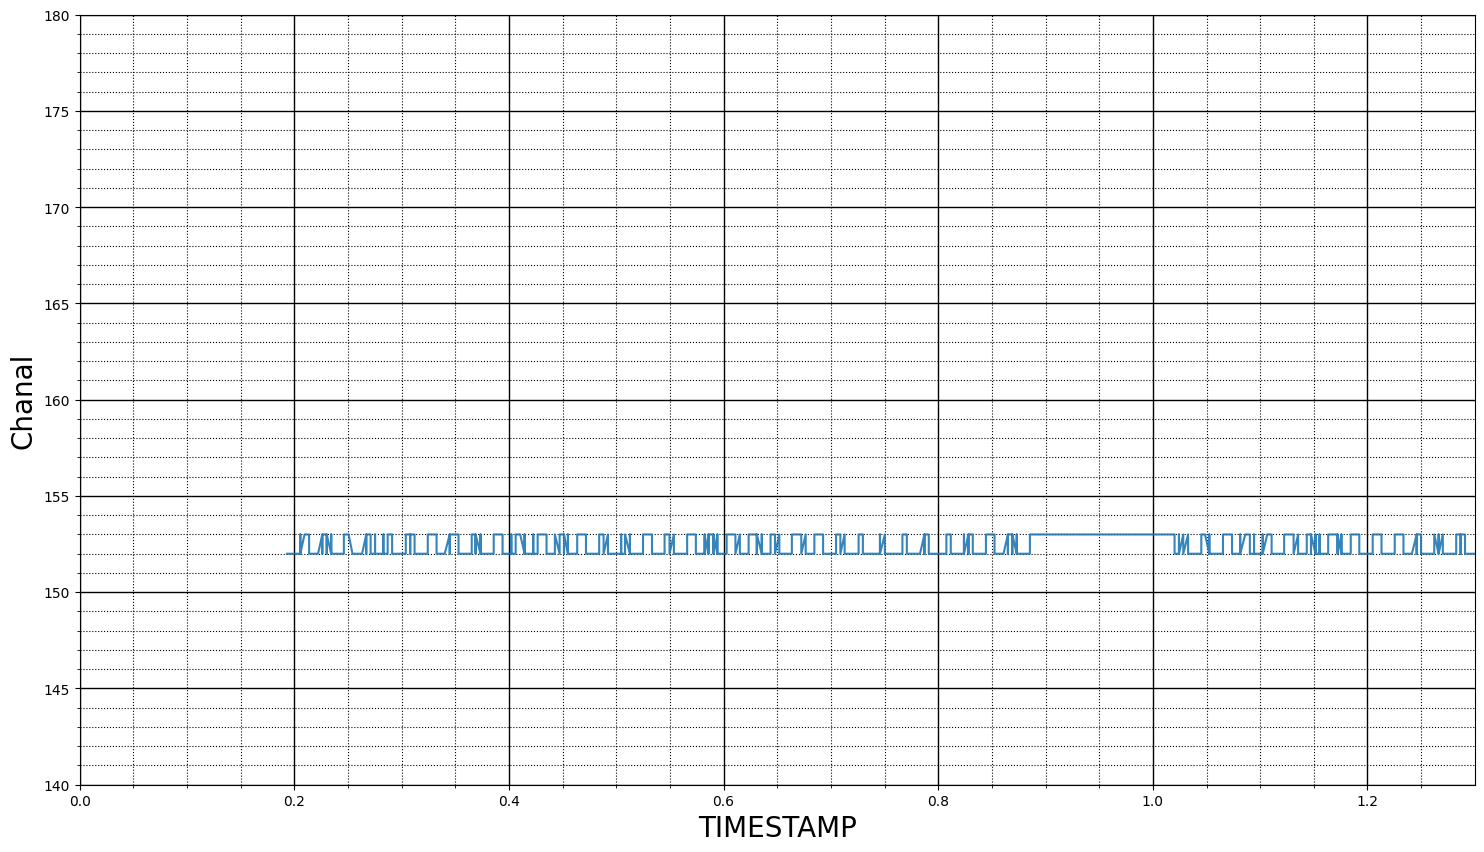

In [ ]:
%%time
df=df_4
plt.figure(figsize=(18, 10))
plt.plot(df['TIMESTAMP'], df['CH_0'],alpha=0.9)
plt.xlabel('TIMESTAMP', fontsize = 20)
plt.ylabel('Chanal', fontsize = 20)
plt.minorticks_on()
plt.xlim([0,1.3])
plt.ylim([140,180])
#  Определяем внешний вид линий основной сетки:
plt.grid(which='major',
        color = 'k',
        linewidth = 1)

#  Определяем внешний вид линий вспомогательной
#  сетки:
plt.grid(which='minor',
        color = 'k',
        linestyle = ':')

In [ ]:
count = df[(df['TIMESTAMP'] >= 0.2) & (df['TIMESTAMP'] <= 0.3)].shape[0]
print(f"Количество значений больше 2 и меньше 3: {count}")

Количество значений больше 2 и меньше 3: 231


CPU times: user 34.5 ms, sys: 0 ns, total: 34.5 ms
Wall time: 80.5 ms


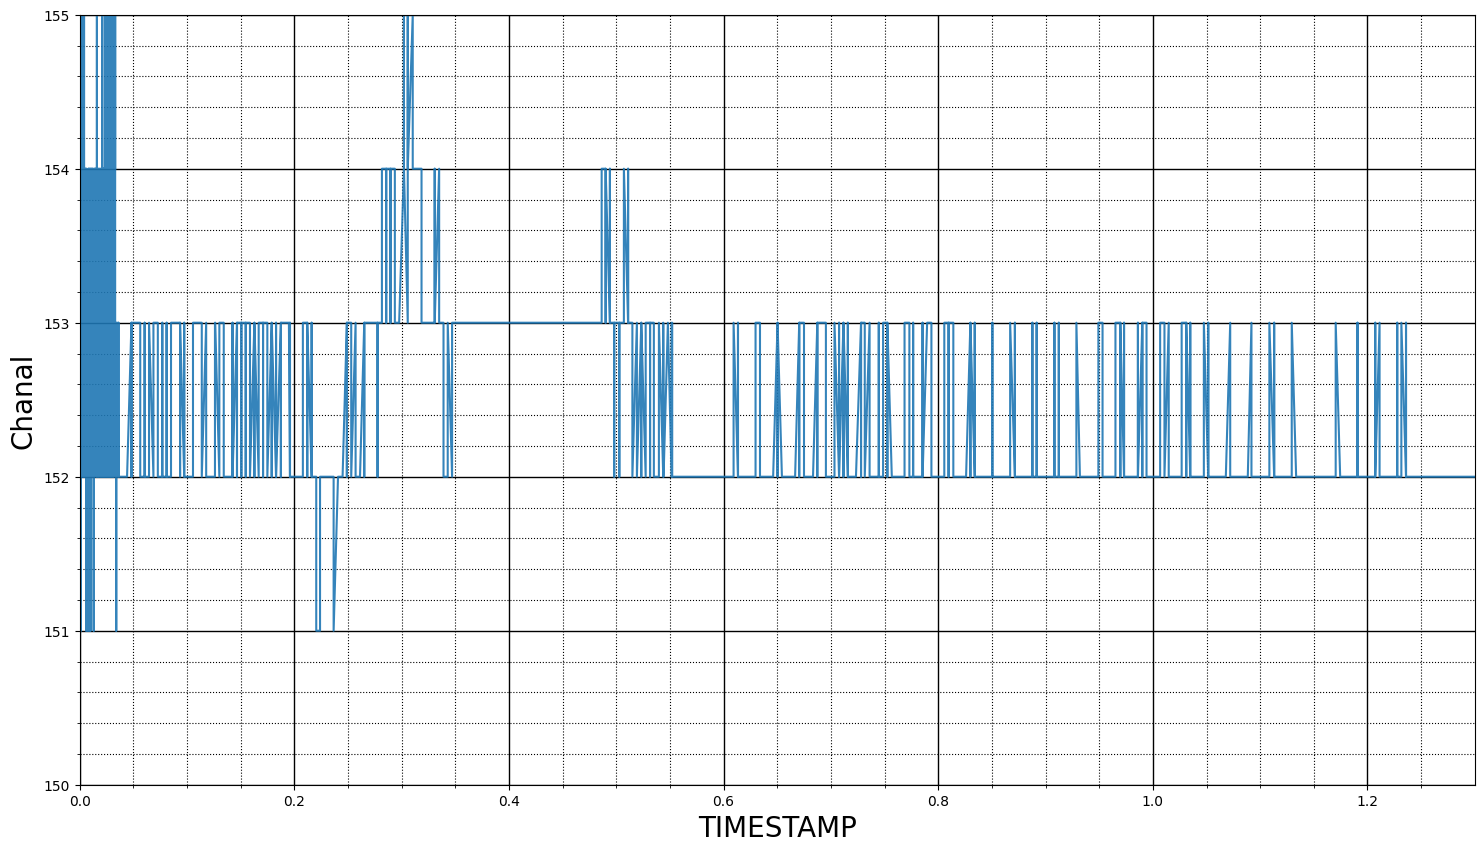

In [ ]:
%%time
df=df_4
plt.figure(figsize=(18, 10))
plt.plot(df['TIMESTAMP'], df['CH_0'],alpha=0.9)
plt.xlabel('TIMESTAMP', fontsize = 20)
plt.ylabel('Chanal', fontsize = 20)
plt.minorticks_on()
plt.xlim([0,1.3])
plt.ylim([150,155])
#  Определяем внешний вид линий основной сетки:
plt.grid(which='major',
        color = 'k',
        linewidth = 1)

#  Определяем внешний вид линий вспомогательной
#  сетки:
plt.grid(which='minor',
        color = 'k',
        linestyle = ':')

CPU times: user 35.8 ms, sys: 0 ns, total: 35.8 ms
Wall time: 48.8 ms


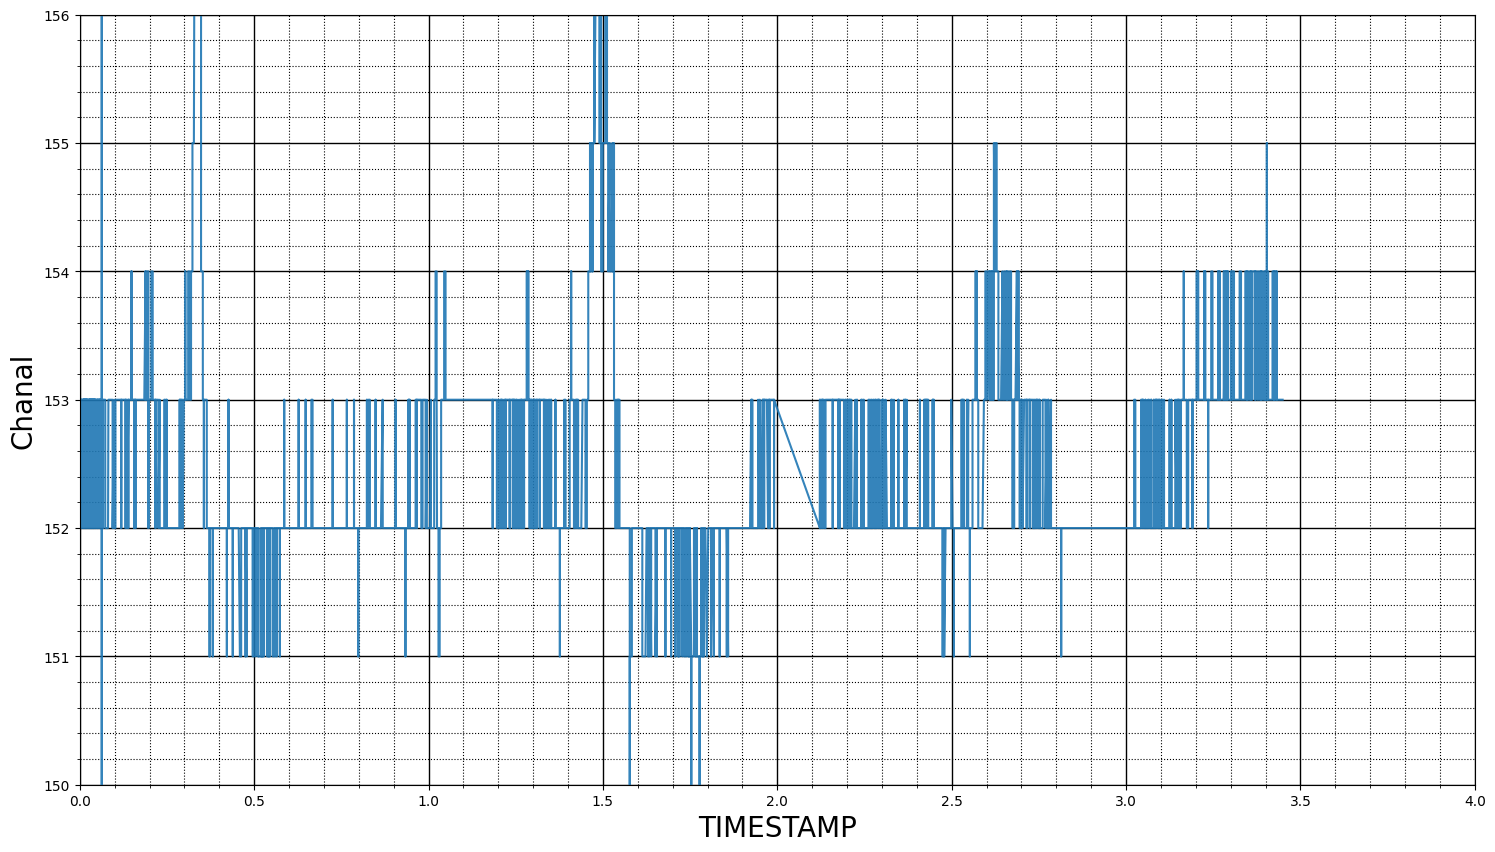

In [ ]:
%%time
df=df_4
plt.figure(figsize=(18, 10))
plt.plot(df['TIMESTAMP'], df['CH_0'],alpha=0.9)
plt.xlabel('TIMESTAMP', fontsize = 20)
plt.ylabel('Chanal', fontsize = 20)
plt.minorticks_on()
plt.xlim([0,4])
plt.ylim([150,156])
#  Определяем внешний вид линий основной сетки:
plt.grid(which='major',
        color = 'k',
        linewidth = 1)

#  Определяем внешний вид линий вспомогательной
#  сетки:
plt.grid(which='minor',
        color = 'k',
        linestyle = ':')

In [ ]:
for i in range(0, len(signal), 512):
        print(i)

In [ ]:
len(signal)

5167

In [ ]:
def get_mean_acceleration(signal, frame_size, hop_length):
    mean = []
    for i in range(0, len(signal), hop_length):
        current_mean = np.sum(signal[i:i+frame_size])/frame_size
        mean.append(current_mean)
    return mean

def get_std(signal, frame_size, hop_length):
    fin_std = []
    for i in range(0, len(signal), hop_length):
        current_std = np.sqrt((np.sum((signal[i:i+frame_size] - (np.sum(signal[i:i+frame_size])/frame_size))**2))/(frame_size-1))
        fin_std.append(current_std)
    return fin_std

def get_variance(signal, frame_size, hop_length):
    fin_var = []
    for i in range(0, len(signal), hop_length):
        current_var = (np.sum(np.sqrt(abs(signal[i:i+frame_size])))/frame_size)**2
        fin_var.append(current_var)
    return fin_var

def get_rms_acceleration(signal, frame_size, hop_length):
    rms = []
    for i in range(0, len(signal), hop_length):
        current_rms = np.sqrt(np.sum(signal[i:i+frame_size]**2)/frame_size)
        rms.append(current_rms)
    return rms

def get_peak_acceleration(signal, frame_size, hop_length):
    peak = []
    for i in range(0, len(signal), hop_length):
        current_frame = max(signal[i:i+frame_size])
        peak.append(current_frame)
    return np.array(peak)

from scipy.stats import skew

def get_skewness(signal, frame_size, hop_length):
    fin_skew = []
    for i in range(0, len(signal), hop_length):
        current_skew = skew(signal[i:i+frame_size])
        fin_skew.append(current_skew)
    return fin_skew

from scipy.stats import kurtosis

def get_kurtosis(signal, frame_size, hop_length):
    fin_kurt = []
    for i in range(0, len(signal), hop_length):
        current_kurt = kurtosis(signal[i:i+frame_size])
        fin_kurt.append(current_kurt)
    return fin_kurt

def get_crest_factor(signal, frame_size, hop_length):
    crest_fac = []
    for i in range(0, len(signal), hop_length):
        curr_crest_fac = np.max(np.abs(signal[i:i+frame_size])) / skew(signal[i:i+frame_size])
        crest_fac.append(curr_crest_fac)
    return crest_fac

def get_margin_factor(signal, frame_size, hop_length):
    mar_fac = []
    for i in range(0, len(signal), hop_length):
        curr_mar_fac = np.max(np.abs(signal[i:i+frame_size])) / ((np.sum(np.sqrt(np.abs(signal[i:i+frame_size])))/ frame_size**2))
        mar_fac.append(curr_mar_fac)
    return mar_fac

def get_shape_factor(signal, frame_size, hop_length):
    fin_shape_fact = []
    for i in range(0, len(signal), hop_length):
        cur_shape_fact = np.sqrt(((np.sum(signal[i:i+frame_size]**2))/frame_size) / (np.sum(np.abs(signal[i:i+frame_size]))/frame_size))
        fin_shape_fact.append(cur_shape_fact)

    return fin_shape_fact

def get_impulse_factor(signal, frame_size, hop_length):
    impulse_factor = []
    for i in range(0, len(signal), hop_length):
        current_impls = max(np.abs(signal[i:i+frame_size]))/(np.sum(np.abs(signal[i:i+frame_size])/frame_size))
        impulse_factor.append(current_impls)
    return impulse_factor

def get_A_factor(signal, frame_size, hop_length):
    A_factor = []
    for i in range(0, len(signal), hop_length):
        current_factor = max(signal[i:i+frame_size])/(np.std(signal[i:i+frame_size])*np.var(signal[i:i+frame_size]))
        A_factor.append(current_factor)
    return A_factor

def get_B_factor(signal, frame_size, hop_length):
    B_factor = []
    for i in range(0, len(signal), hop_length):
        current_b_factor = (kurtosis(signal[i:i+frame_size]))*(np.max(np.abs(signal[i:i+frame_size])) / skew(signal[i:i+frame_size]))/(np.sqrt((np.sum((signal[i:i+frame_size] - (np.sum(signal[i:i+frame_size])/frame_size))**2))/(frame_size-1)))
        B_factor.append(current_b_factor)
    return B_factor

In [ ]:
list_features_function = [get_peak_acceleration, get_rms_acceleration, get_crest_factor,get_std, get_variance,
                          get_skewness, get_kurtosis, get_shape_factor, get_impulse_factor, get_margin_factor,
                         get_mean_acceleration, get_A_factor, get_B_factor]

print('Number of feature extruction methods: ', len(list_features_function))

Number of feature extruction methods:  13


In [ ]:
def get_all_fetures(X, frame_size, hop_length):
    stationary_features = []
    for func in list_features_function:
        f = func(signal, frame_size, hop_length)
        stationary_features.append(f)
    return stationary_features

In [ ]:
signal=df['CH_0']

In [ ]:
features = get_all_fetures(signal, frame_size=1024, hop_length=512)
np.array(features).T.shape

(11, 13)

In [ ]:
signal

In [ ]:
ready_data=pd.DataFrame({'Mean': np.array(features).T[:, 0],
                         'STD': np.array(features).T[:, 1],
                         'Variance': np.array(features).T[:, 2],
                         'RMS': np.array(features).T[:, 3],
                         'Peak val': np.array(features).T[:, 4],
                         'Skewness': np.array(features).T[:, 5],
                         'Kurtosis': np.array(features).T[:, 6],
                         'Crest factor': np.array(features).T[:, 7],
                         'Margin factor': np.array(features).T[:, 8],
                         'SHape factor': np.array(features).T[:, 9],
                         'Impulse factor': np.array(features).T[:, 10],
                         'A factor': np.array(features).T[:, 11],
                         'B factor': np.array(features).T[:, 12]
                        })

In [ ]:
ready_data

In [ ]:
%matplotlib inline
import librosa
import librosa.display
import IPython
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sr = df[(df['TIMESTAMP'] >= 2) & (df['TIMESTAMP'] <= 3)].shape[0]
print(f"Количество значений больше 2 и меньше 3: {sr}")

Количество значений больше 2 и меньше 3: 193


In [ ]:
len(df_4['CH_0'].astype(float).to_numpy())

5167

Text(0.5, 1.0, 'MFCC')

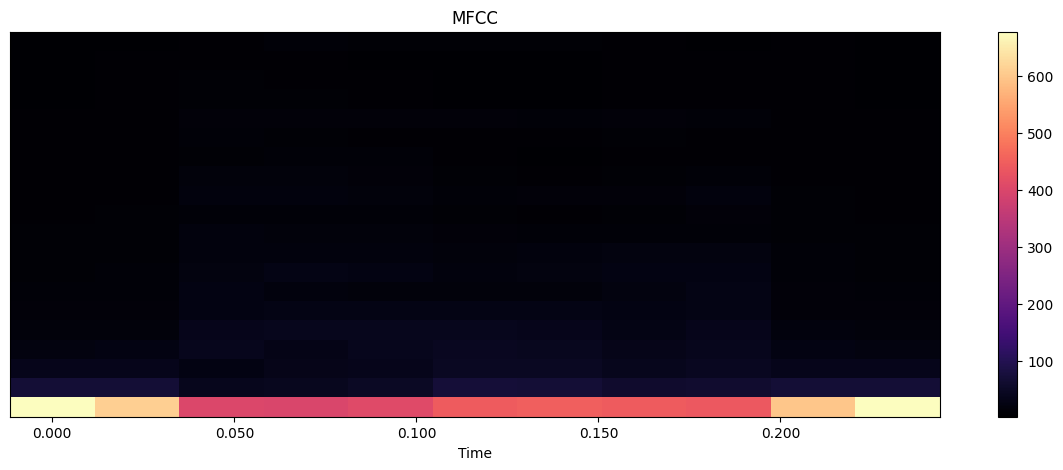

In [ ]:
# Calculate MFCCs
mfccs = librosa.feature.mfcc(y=df['CH_0'].astype(float).to_numpy(), sr=sr, n_mfcc=20)
plt.figure(figsize=(15, 5))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')

In [ ]:
mfccs

In [ ]:
len(mfccs)

20

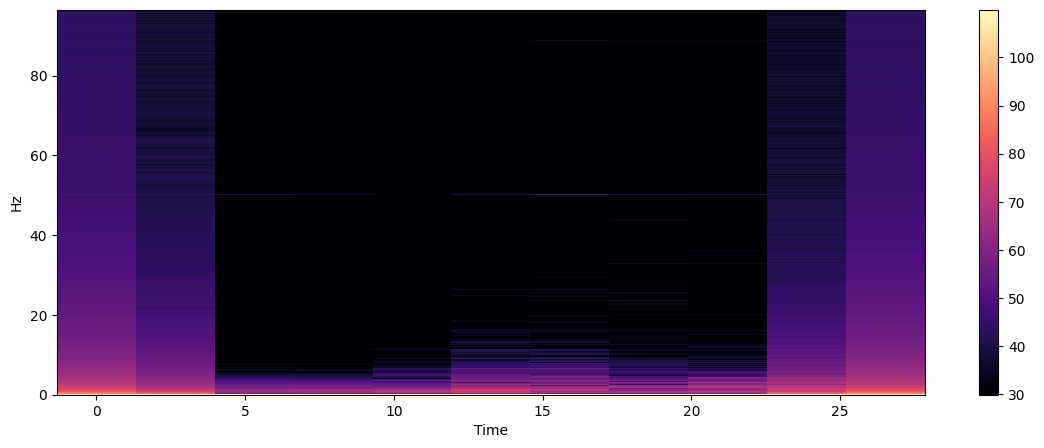

In [ ]:
X = librosa.stft(df['CH_0'].astype(float).to_numpy())
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

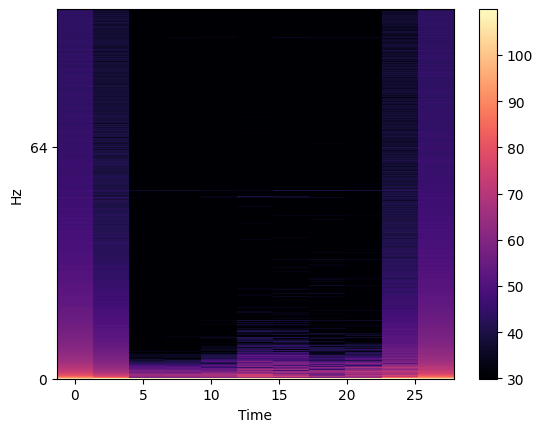

In [ ]:
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

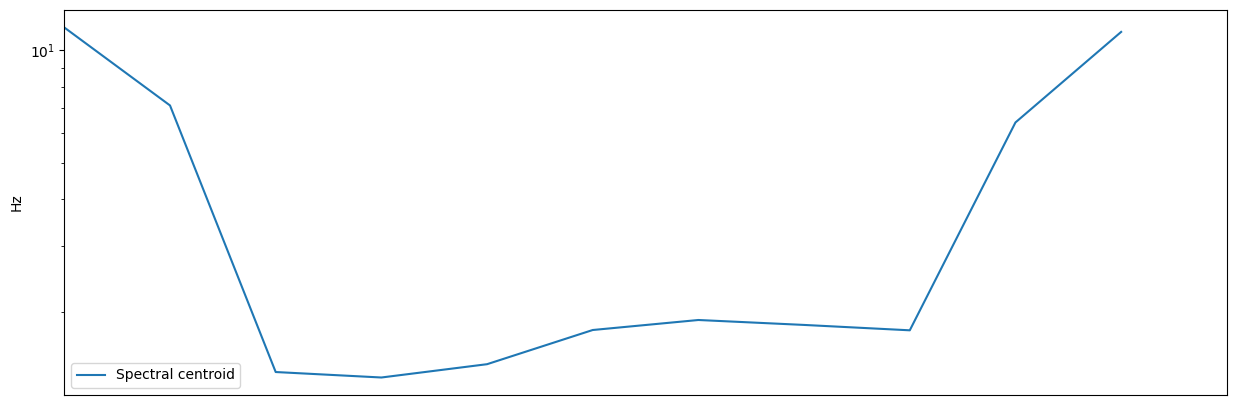

In [ ]:
# Spectral Centroid
cent = librosa.feature.spectral_centroid(y=df['CH_0'].astype(float).to_numpy(), sr=sr)
plt.figure(figsize=(15,5))
plt.subplot(1, 1, 1)
plt.semilogy(cent.T, label='Spectral centroid')
plt.ylabel('Hz')
plt.xticks([])
plt.xlim([0, cent.shape[-1]])
plt.legend()

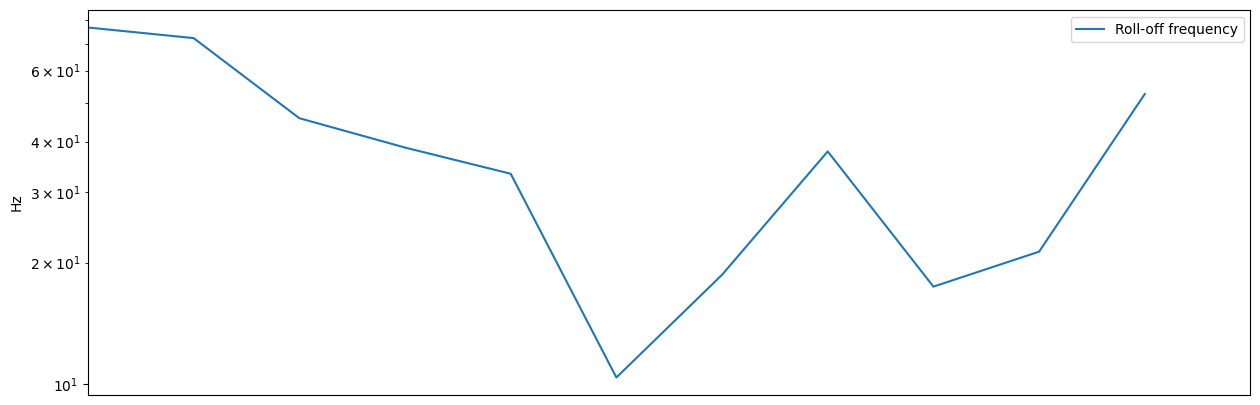

In [ ]:
# Spectral Rolloff
rolloff = librosa.feature.spectral_rolloff(y=df_new['CH_0'].astype(float).to_numpy(), sr=sr)
plt.figure(figsize=(15,5))
plt.semilogy(rolloff.T, label='Roll-off frequency')
plt.ylabel('Hz')
plt.xticks([])
plt.xlim([0, rolloff.shape[-1]])
plt.legend()

In [ ]:
sum((df['CH_0']))/len(df['CH_0'])

305.61041223146896

In [ ]:
df_new = df

In [ ]:
df_new['CH_0'] = df['CH_0'] - 305

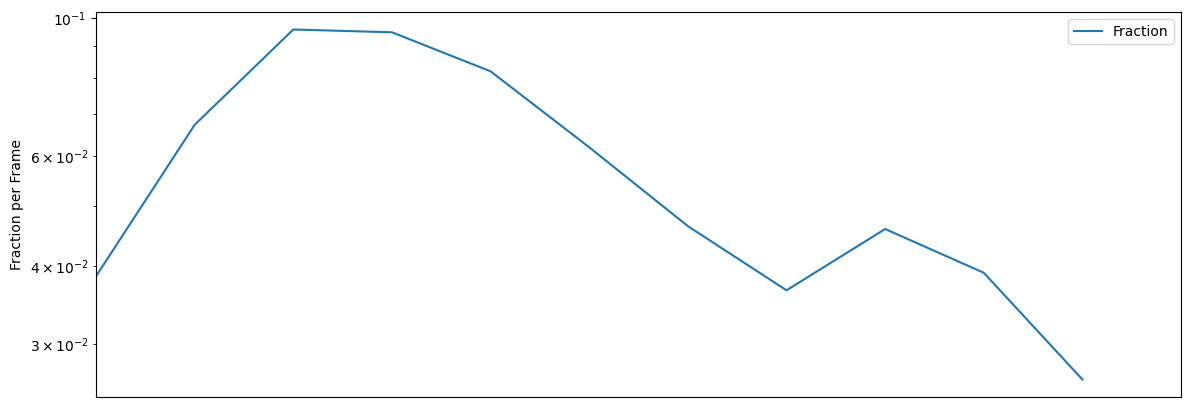

In [ ]:
# Zero Crossing Rate
zrate=librosa.feature.zero_crossing_rate(df_new['CH_0'].astype(float).to_numpy())
plt.figure(figsize=(14,5))
plt.semilogy(zrate.T, label='Fraction')
plt.ylabel('Fraction per Frame')
plt.xticks([])
plt.xlim([0, rolloff.shape[-1]])
plt.legend()

,mfccs_mean_0,mfccs_mean_1,mfccs_mean_2,mfccs_mean_3,mfccs_mean_4,mfccs_mean_5,mfccs_mean_6,mfccs_mean_7,mfccs_mean_8,mfccs_mean_9,...,mfccs_std_10,mfccs_std_11,mfccs_std_12,mfccs_std_13,mfccs_std_14,mfccs_std_15,mfccs_std_16,mfccs_std_17,mfccs_std_18,mfccs_std_19
0,504.036417,59.541826,35.961504,31.086975,28.149023,21.1488,16.652465,17.730019,14.935544,11.344832,...,2.167824,5.180101,3.798947,2.606835,2.015041,3.854014,1.570681,1.11002,1.549314,2.477556


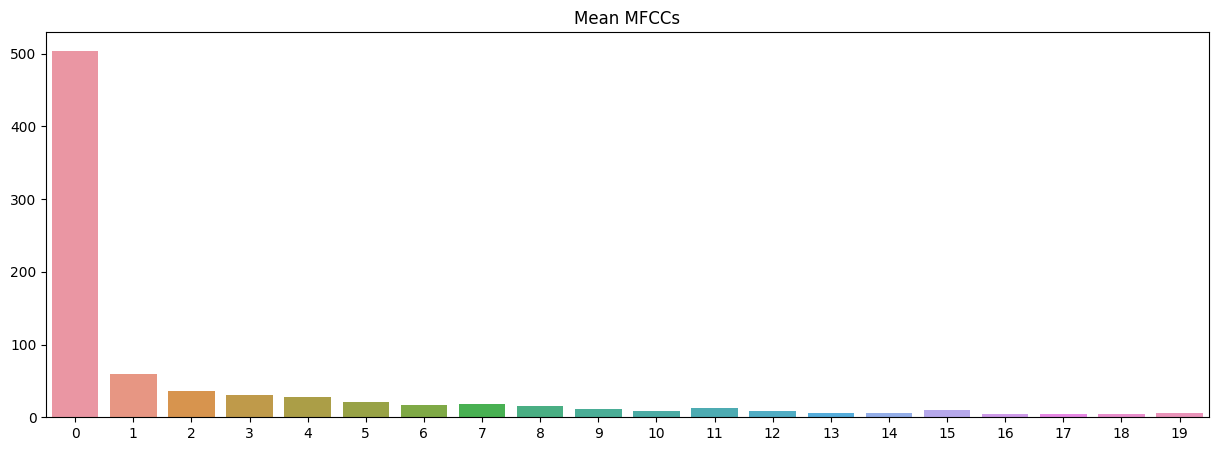

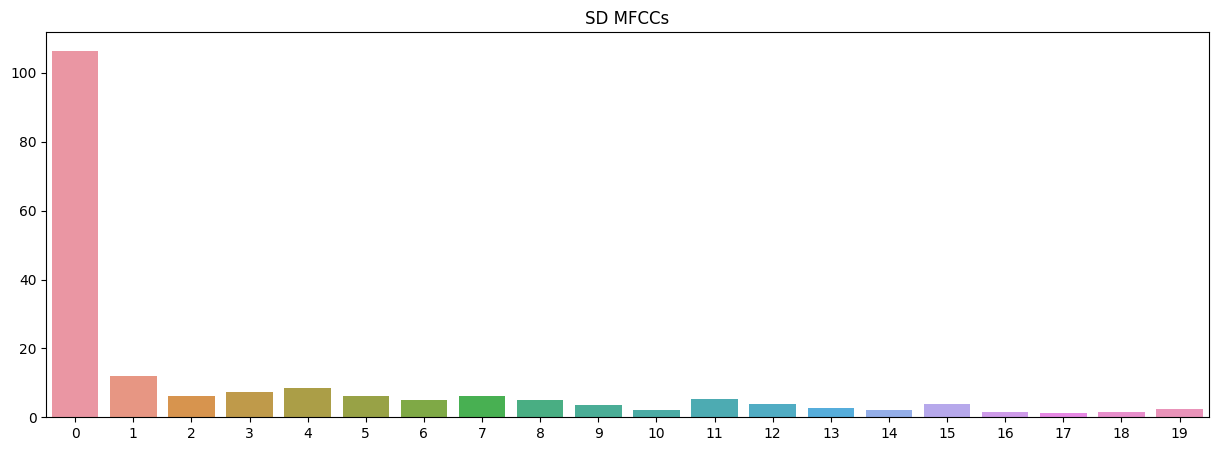

In [ ]:
# Feature Generation
# MFCCs
mfccs_mean=np.mean(mfccs,axis=1)
mfccs_std=np.std(mfccs,axis=1)

coeffs=np.arange(0,20)
plt.figure(figsize=(15,5))
plt.title('Mean MFCCs')
sns.barplot(x=coeffs,y=mfccs_mean)

plt.figure(figsize=(15,5))
plt.title('SD MFCCs')
sns.barplot(x=coeffs,y=mfccs_std)
# Generate the chroma Dataframe
mfccs_df=pd.DataFrame()
for i in range(0,20):
    mfccs_df['mfccs_mean_'+str(i)]=mfccs_mean[i]
for i in range(0,20):
    mfccs_df['mfccs_std_'+str(i)]=mfccs_mean[i]
mfccs_df.loc[0]=np.concatenate((mfccs_mean,mfccs_std),axis=0)
mfccs_df

In [ ]:
import pandas as pd
import numpy as np

def extract_features(directory, file):
    name = f'{directory}/{file}'
    y = pd.read_csv(name, sep=',')

    # Удаляем столбец 'EVENT_MARKER'
    y = y.drop('EVENT_MARKER', axis=1)

    # Приводим значения столбца 'TIMESTAMP' к относительным секундам
    y['TIMESTAMP'] = (y['TIMESTAMP'] - y['TIMESTAMP'][0])/10**9

    sr = 2800

    # Удаляем строки с 'TIMESTAMP' <= 0.1
    indices_to_drop = y[y['TIMESTAMP'] <= 0.1].index
    y = y.drop(indices_to_drop, axis=0)

    # Оставляем только столбец 'CH_0'
    y = y['CH_0']

    # Преобразуем в numpy массив
    y = y.to_numpy()

    features = []
    features.append(file)  # Имя файла

    # Вычисляем среднее абсолютное значение (MAV) для сигнала
    mav = np.mean(np.abs(y))
    features.append(mav)

    # Вычисляем общую длину контура (WL)
    wl = np.sum(np.abs(np.diff(y)))
    features.append(wl)

    # Вычисляем среднюю мощность сигнала (MNP)
    mnp = np.mean(np.power(y, 4))
    features.append(mnp)

    # Вычисляем среднеквадратическое значение (RMS) для сигнала
    rms = np.sqrt(np.mean(np.square(y)))
    features.append(rms)

    # Вычисляем среднее абсолютное изменение (AAC) для сигнала
    aac = np.mean(np.abs(np.diff(y)))
    features.append(aac)

    # Вычисляем взвешенную амплитуду модулирования (WAMP) для сигнала
    wamp = np.sum(np.abs(np.diff(y)) > 0.01) / len(y)
    features.append(wamp)

    # Вычисляем среднее абсолютное изменение первой разности (SM1) для сигнала
    sm1 = np.mean(np.abs(np.diff(np.diff(y))))
    features.append(sm1)

     # Вычисляем среднее квадратичное отклонение (STD) для сигнала
    std = np.std(y)
    features.append(std)

    # Вычисляем коэффициент асимметрии (SKW) для сигнала
    skw = np.mean(np.power((y - np.mean(y)) / np.std(y), 3))
    features.append(skw)

    # Вычисляем коэффициент эксцесса (KRT) для сигнала
    krt = np.mean(np.power((y - np.mean(y)) / np.std(y), 4)) - 3
    features.append(krt)

    mfcc = librosa.feature.mfcc(y=y.astype(float), n_mfcc=13, sr=sr)
    mfcc_mean = np.mean(mfcc, axis=1)  # Среднее значение по каждому коэффициенту
    features.extend(mfcc_mean)

    ssc = np.mean(np.diff(np.sign(np.diff(y))))
    features.append(ssc)

    # # Вычисляем Spectral Flatness (AFB)
    # afb = librosa.feature.spectral_flatness(y=y.astype(float))
    # afb_mean = np.mean(afb)
    # features.append(afb_mean)

    # Добавляем имя директории в качестве признака
    features.append(directory.split('/')[-1])

    return features


In [ ]:
# def extract_features(directory, file):
#     name = f'{directory}/{file}'
#     y, sr = librosa.load(name, mono=True, duration=5)
#     sr=2044

#     features = []
#     features.append(file) # filename
#     features.extend([np.mean(e) for e in librosa.feature.mfcc(y=y, sr=sr,
#                                                               n_mfcc=20)])  # mfcc_mean<0..20>
#     features.extend([np.std(e) for e in librosa.feature.mfcc(y=y, sr=sr,
#                                                              n_mfcc=20)])   # mfcc_std
#     features.append(np.mean(librosa.feature.spectral_centroid(y=y, sr=sr).T,
#                             axis = 0)[0])     # cent_mean
#     features.append(np.std(librosa.feature.spectral_centroid(y=y,sr=sr).T,
#                            axis = 0)[0])       # cent_std
#     features.append(scipy.stats.skew(librosa.feature.spectral_centroid(y=y,sr=sr).T,
#                                      axis = 0)[0])    # cent_skew
#     features.append(np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr).T,
#                             axis = 0)[0])      # rolloff_mean
#     features.append(np.std(librosa.feature.spectral_rolloff(y=y, sr=sr).T,
#                            axis = 0)[0])       # rolloff_std


#     features.append(directory.split('/')[-1])
#     return features

In [ ]:
# y, sr = librosa.load('/content/drive/MyDrive/yes/log_rech.csv', mono=True, duration=5)

In [ ]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import pathlib
import csv


import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Cписки файлов
nazad_dir, _, nazad_files = next(os.walk('/content/drive/MyDrive/Sub_min/nazad'))
vpered_dir, _, vpered_files = next(os.walk('/content/drive/MyDrive/Sub_min/vpered'))
napravo_dir, _, napravo_files = next(os.walk('/content/drive/MyDrive/Sub_min/napravo'))
shum_dir, _, shum_files = next(os.walk('/content/drive/MyDrive/Sub_min/shum'))
print(f"nazad files: {len(nazad_files)}\nvpered files: {len(vpered_files)}\nnapravo files: {len(napravo_files)}\nshum files: {len(shum_files)}")


nazad files: 20
vpered files: 20
napravo files: 9
shum files: 11


In [ ]:
#Cписки файлов
nazad_dir, _, nazad_files = next(os.walk('/content/drive/MyDrive/Sub/nazad'))
vpered_dir, _, vpered_files = next(os.walk('/content/drive/MyDrive/Sub/vpered'))
napravo_dir, _, napravo_files = next(os.walk('/content/drive/MyDrive/Sub/napravo'))
shum_dir, _, shum_files = next(os.walk('/content/drive/MyDrive/Sub/shum'))
print(f"nazad files: {len(nazad_files)}\nvpered files: {len(vpered_files)}\nnapravo files: {len(napravo_files)}\nshum files: {len(shum_files)}")


nazad files: 60
vpered files: 59
napravo files: 40
shum files: 41


In [ ]:
# buffer = []
# buffer_size = 5000
# buffer_counter = 0

# # Создание заголовка для файла CSV.
# header = ['filename']
# header.extend([f'mfcc_mean{i}' for i in range(1, 21)])
# header.extend([f'mfcc_std{i}' for i in range(1, 21)])
# header.extend(['cent_mean', 'cent_std', 'cent_skew', 'rolloff_mean', 'rolloff_std',
#                'label'])

# with open('dataset.csv', 'w', newline='') as file:
#     writer = csv.writer(file, delimiter=',')
#     writer.writerow(header)
#     for directory, files in [(nazad_dir, nazad_files), (vpered_dir, vpered_files), (shum_dir, shum_files)]:
#         for file in files:
#             features = extract_features(directory, file)
#             if buffer_counter + 1 == buffer_size:
#                 buffer.append(features)
#                 writer.writerows(buffer)
#                 print(f"- [{directory.split('/')[-1]}] Write {len(buffer)} rows")
#                 buffer = []
#                 buffer_counter = 0
#             else:
#                 buffer.append(features)
#                 buffer_counter += 1
#         if buffer:
#             writer.writerows(buffer)
#             print(f"- [{directory.split('/')[-1]}] Write {len(buffer)} rows")
#         print(f"- [{directory.split('/')[-1]}] Writing complete")
#         buffer = []
#         buffer_counter = 0

In [ ]:
import csv

buffer = []
buffer_size = 5000
buffer_counter = 0

# Create the header for the CSV file.
header = ['filename']
header.extend(['MAV', 'WL', 'MNP', 'RMS', 'AAC', 'WAMP', 'SM1', 'STD', 'SKW', 'KRT', 'SSC', 'MFCC_1' , 'MFCC_2' , 'MFCC_3', 'MFCC_4',
                'MFCC_5', 'MFCC_6', 'MFCC_7', 'MFCC_8', 'MFCC_9', 'MFCC_10', 'MFCC_11', 'MFCC_12', 'MFCC_13','label'])

with open('dataset.csv', 'w', newline='') as file:
    writer = csv.writer(file, delimiter=',')
    writer.writerow(header)

    for directory, files in [(nazad_dir, nazad_files), (vpered_dir, vpered_files),(napravo_dir, napravo_files), (shum_dir, shum_files)]:
        for file in files:
            features = extract_features(directory, file)


            if buffer_counter + 1 == buffer_size:
                buffer.append(features)
                writer.writerows(buffer)
                print(f"- [{directory.split('/')[-1]}] Write {len(buffer)} rows")
                buffer = []
                buffer_counter = 0
            else:
                buffer.append(features)
                buffer_counter += 1

        if buffer:
            writer.writerows(buffer)
            print(f"- [{directory.split('/')[-1]}] Write {len(buffer)} rows")

        print(f"- [{directory.split('/')[-1]}] Writing complete")
        buffer = []
        buffer_counter = 0


- [nazad] Write 60 rows
- [nazad] Writing complete
- [vpered] Write 59 rows
- [vpered] Writing complete
- [napravo] Write 40 rows
- [napravo] Writing complete
- [shum] Write 41 rows
- [shum] Writing complete


In [ ]:
data = pd.read_csv('/content/dataset.csv')
data

,filename,MAV,WL,MNP,RMS,AAC,WAMP,SM1,STD,SKW,...,MFCC_5,MFCC_6,MFCC_7,MFCC_8,MFCC_9,MFCC_10,MFCC_11,MFCC_12,MFCC_13,label
0,log_nazad_11.csv,152.307888,528.0,5.381732e+08,152.308833,0.192000,0.191930,0.384140,0.536633,1.366555,...,15.569480,11.521652,9.796478,9.593751,6.818060,7.644649,7.078075,5.333977,0.000000,nazad
1,log_nazad_12.csv,152.153739,575.0,5.361173e+08,152.157503,0.200979,0.200908,0.399650,1.070270,0.712387,...,15.259676,11.277892,9.458487,8.844951,7.145649,7.207136,7.239983,5.539280,-0.000350,nazad
2,log_nazad_13.csv,152.506687,404.0,5.410730e+08,152.509615,0.207926,0.207819,0.416066,0.944965,0.600730,...,16.151570,12.602916,10.190164,8.699388,7.374044,6.904364,8.031006,5.318399,0.000000,nazad
3,log_nazad_14.csv,152.050000,192.0,5.345140e+08,152.050390,0.154964,0.154839,0.310178,0.344191,0.787355,...,13.310805,10.996086,9.343655,8.232973,7.312398,6.513959,6.016859,5.468136,0.000000,nazad
4,log_nazad_15.csv,152.235864,434.0,5.371662e+08,152.237053,0.175354,0.175283,0.350849,0.601645,0.703464,...,14.058737,13.834307,9.323275,8.777275,7.528960,6.443722,7.704475,6.330481,0.000000,nazad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,log_shym_46.csv,151.863000,613.0,5.319031e+08,151.863718,0.150540,0.150503,0.300909,0.466810,-0.542439,...,11.451010,9.033931,9.529097,8.117746,7.037028,7.963861,6.985642,4.436714,-0.000246,shum
196,log_shym_47.csv,151.859177,685.0,5.318498e+08,151.859902,0.152425,0.152392,0.304919,0.469269,-0.590432,...,11.156516,11.605514,10.455867,7.924997,6.852166,7.061567,7.367505,6.256061,0.000000,shum
197,log_shym_48.csv,151.791367,622.0,5.308995e+08,151.792067,0.131640,0.131401,0.263336,0.460980,-0.783008,...,12.199437,10.547798,10.224681,6.752197,7.223240,7.969596,7.727699,5.001928,0.000000,shum
198,log_shym_49.csv,151.918049,884.0,5.326791e+08,151.918871,0.149704,0.149509,0.299458,0.499633,-0.062829,...,10.591940,8.917850,9.997445,7.326129,7.560932,9.126796,7.518891,5.198567,0.000000,shum


In [ ]:
data = data.dropna()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import librosa
import os
import pathlib

import pylab as pl
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import csv

In [ ]:
data['label'].value_counts()

nazad      60
vpered     59
shum       41
napravo    40
Name: label, dtype: int64

In [ ]:
y = data['label'].values
y[0:5]

array(['nazad', 'nazad', 'nazad', 'nazad', 'nazad'], dtype=object)

In [ ]:
from imblearn.over_sampling import SMOTE

# Предположим, что у вас есть массив признаков X и массив целевых переменных y
# Создание экземпляра SMOTE
smote = SMOTE()
# Генерация новых примеров
X, y = smote.fit_resample(X, y)

In [ ]:
data.columns

Index(['filename', 'MAV', 'WL', 'MNP', 'RMS', 'AAC', 'WAMP', 'SM1', 'STD',
       'SKW', 'KRT', 'MFCC_1', 'MFCC_2', 'MFCC_3', 'ZC', 'SSC', 'AFB',
       'label'],
      dtype='object')

In [ ]:
X = data[['MAV',	'WL',	'MNP',	'RMS',	'AAC',	'WAMP',	'SM1', 'STD', 'SKW', 'KRT', 'SSC','MFCC_1', 'MFCC_2' , 'MFCC_3', 'MFCC_4',
                'MFCC_5', 'MFCC_6', 'MFCC_7', 'MFCC_8', 'MFCC_9', 'MFCC_10', 'MFCC_11', 'MFCC_12', 'MFCC_13'	]]

In [ ]:
X

In [ ]:
X = data[['mfcc_mean1', 'mfcc_mean2', 'mfcc_mean3', 'mfcc_mean4',
       'mfcc_mean5', 'mfcc_mean6', 'mfcc_mean7', 'mfcc_mean8', 'mfcc_mean9',
       'mfcc_mean10', 'mfcc_mean11', 'mfcc_mean12', 'mfcc_mean13',
       'mfcc_mean14', 'mfcc_mean15', 'mfcc_mean16', 'mfcc_mean17',
       'mfcc_mean18', 'mfcc_mean19', 'mfcc_mean20', 'mfcc_std1', 'mfcc_std2',
       'mfcc_std3', 'mfcc_std4', 'mfcc_std5', 'mfcc_std6', 'mfcc_std7',
       'mfcc_std8', 'mfcc_std9', 'mfcc_std10', 'mfcc_std11', 'mfcc_std12',
       'mfcc_std13', 'mfcc_std14', 'mfcc_std15', 'mfcc_std16', 'mfcc_std17',
       'mfcc_std18', 'mfcc_std19', 'mfcc_std20', 'cent_mean', 'cent_std',
       'cent_skew', 'rolloff_mean', 'rolloff_std']]
X[0:5]

In [ ]:
# X = X.drop(['KRT'], axis=1)

In [ ]:
X

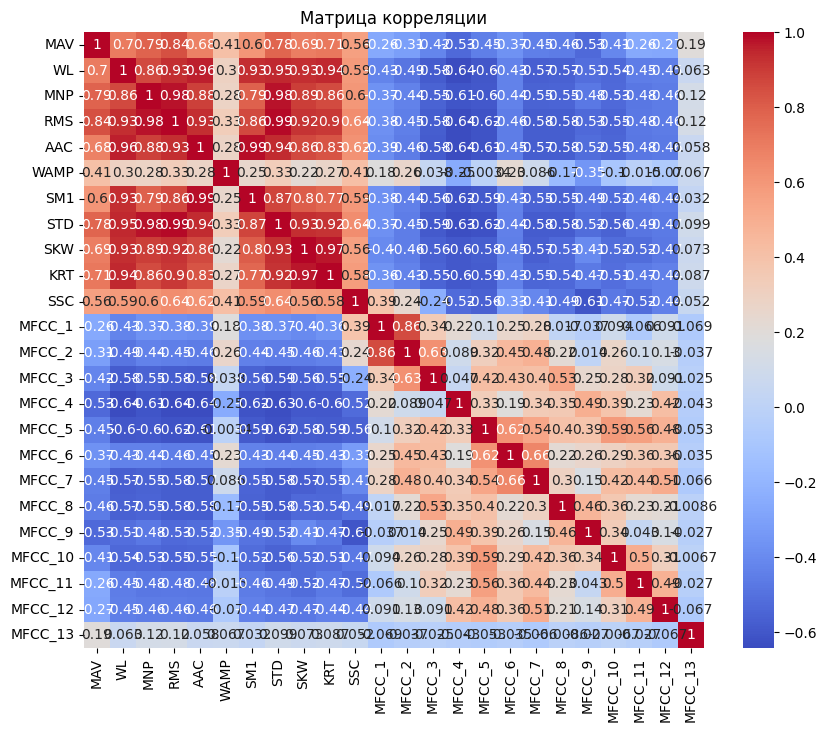

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = X.corr()

# Отобразите матрицу корреляции с помощью тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Матрица корреляции')
plt.show()

In [ ]:
X.drop(X['WL'], axis=1)

In [ ]:
xx = np.array([X['MAV'],X['WL'],X['MNP']])

In [ ]:
xx=X[:,1]

In [ ]:
scaler = preprocessing.StandardScaler()
features_scaled = scaler.fit_transform(xx[:, np.newaxis])
features_reshaped = features_scaled.reshape(1, -1)

NameError: ignored

In [ ]:
# features_reshaped

array([[-0.70710718, -0.70710639,  1.41421356]])

In [ ]:
from sklearn import preprocessing
X= preprocessing.StandardScaler().fit(X).transform(X)
X

array([[-4.37139888e-01,  6.24030064e-02,  5.94697382e-01, ...,
         4.21367483e-01, -6.14442574e-01,  6.47914287e-04],
       [-3.98146748e-01,  5.31750523e-02,  1.39825404e+00, ...,
         5.68374026e-01, -4.13655404e-01, -1.04783005e+00],
       [ 2.97960921e-01,  6.41009808e-01,  1.10204779e+00, ...,
         1.28659660e+00, -6.29677846e-01,  6.47914287e-04],
       ...,
       [-1.54919108e+00, -2.12202070e+00, -1.72092440e+00, ...,
        -4.73814070e-01,  1.18008831e-01,  6.47914287e-04],
       [-1.57646021e+00, -5.57521538e-01,  1.59633404e+00, ...,
        -9.73136563e-02, -3.61257765e-01,  6.47914287e-04],
       [ 6.64833027e-01,  6.63749339e-01,  1.78859613e-01, ...,
         6.52203129e-01,  2.46638332e-01,  6.47914287e-04]])

In [ ]:
import matplotlib.pyplot as plt

# Предполагая, что вы уже выполнели шкалирование признаков в X

# Отображение первых двух столбцов X
plt.scatter(X['MAV'], X['WL'])
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.title('График точек для кластеризации')
plt.show()

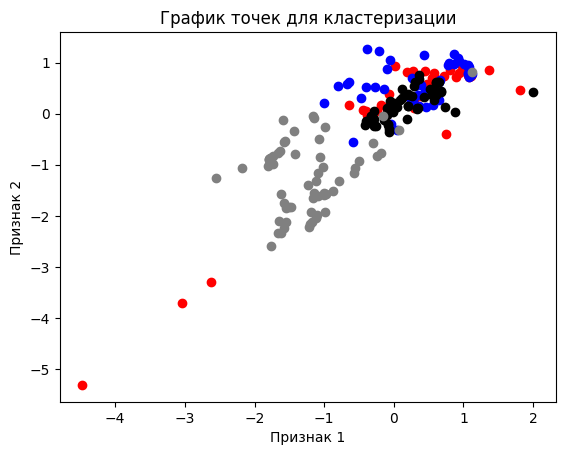

In [ ]:
import matplotlib.pyplot as plt

# Предполагая, что вы уже выполнели шкалирование признаков в X

# Create a dictionary to map labels to colors
label_colors = {'nazad': 'red', 'vpered': 'blue', 'napravo': 'black', 'shum': 'gray'}

# Plot the points with different colors based on the label
for label in label_colors:
    plt.scatter(X[y == label, 0], X[y == label, 1], c=label_colors[label], label=label)
# Отображение первых двух столбцов X
# plt.scatter(X[:, 0], X[:, 1])
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
# plt.xlim([-0.15,0.05])
# plt.ylim([-0.3,0.0])
plt.title('График точек для кластеризации')
plt.show()


In [ ]:
# y_train

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming you have already performed the feature scaling on X

# Applying PCA to reduce the dimensionality to 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plotting the reduced data
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('График точек для кластеризации (PCA)')
plt.show()


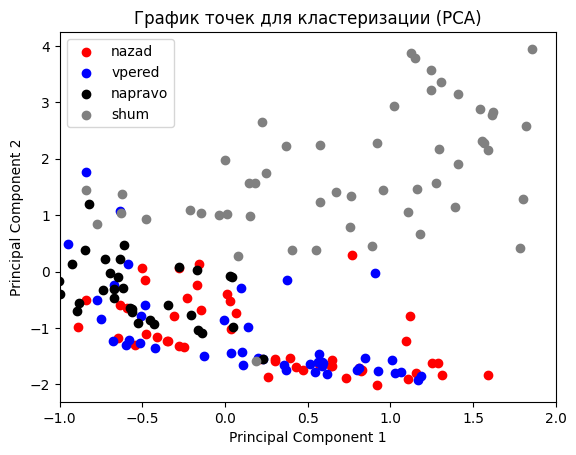

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming you have already performed the feature scaling on X
# Assuming y is the target variable with values 'yes' or 'no'

# Applying PCA to reduce the dimensionality to 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a dictionary to map labels to colors
label_colors = {'nazad': 'red', 'vpered': 'blue', 'napravo': 'black', 'shum': 'gray'}

# Plot the points with different colors based on the label
for label in label_colors:
    plt.scatter(X_pca[y == label, 0], X_pca[y == label, 1], c=label_colors[label], label=label)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.xlim([-1,2])
# plt.ylim([-1,1])
plt.title('График точек для кластеризации (PCA)')
plt.legend()
plt.show()


In [ ]:
import plotly.graph_objects as go

# Создание трехмерного графика
fig = go.Figure(data=[go.Scatter3d(
    x=X_pca[y == label, 0],
    y=X_pca[y == label, 1],
    z=X_pca[y == label, 2],
    mode='markers',
    marker=dict(
        size=5,
        color=label_colors[label],
        opacity=0.8
    ),
    name=label
) for label in label_colors])

# Настройка макета графика
fig.update_layout(
    scene=dict(
        xaxis_title='Principal Component 1',
        yaxis_title='Principal Component 2',
        zaxis_title='Principal Component 3',
        aspectratio=dict(x=1, y=1, z=0.7),
        camera=dict(
            eye=dict(x=1.2, y=1.2, z=0.6)  # Начальное положение камеры
        )
    )
)

# Отображение интерактивного графика
fig.show()


In [ ]:
from sklearn.decomposition import PCA

# Применение PCA для уменьшения размерности
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Получение матрицы главных компонент
components = pca.components_

# Вывод вкладов каждого признака в каждую главную компоненту
for i, component in enumerate(components):
    print("Главная компонента", i+1)
    for j, feature in enumerate(component):
        print("Признак", j+1, ":", feature)
    print()


In [ ]:
X_pca[y == label, 0]

NameError: ignored

In [ ]:
X

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Создание экземпляра класса LabelEncoder
label_encoder = LabelEncoder()

# Преобразование текстовых меток в числовой формат
y_train_encoded = label_encoder.fit_transform(y)

In [ ]:
y_train_encoded

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3])

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Создание экземпляра класса OneHotEncoder
encoder = OneHotEncoder()

# Преобразование числовых меток в формат one-hot encoding
y_train_encoded = encoder.fit_transform(y_train_encoded.reshape(-1, 1)).toarray()

In [ ]:
y_train_encoded

In [ ]:
from sklearn.model_selection import train_test_split
# Разделение набора данных на тренировочные и тестовые наборы (train/test split)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2,
                                                            random_state=17)

# размер тренировочных и тестовых наборов (количество строк, колонок):
print ('Train set:', X_train.shape, y_train.shape)
print ('Test set:', X_test.shape, y_test.shape)

from sklearn import svm
clf = svm.SVC(kernel='rbf')   #  функция ядра - RBF (радиальная базисная функция)
clf.fit(X_train, y_train)     # Обучение модели на тренировочном наборе
yhat = clf.predict(X_test)    # для прогнозирования новых значений:
yhat [0:10]

from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, clf.predict(X_train)))
print("Test set Accuracy: ",metrics.accuracy_score(y_test, yhat) )

Train set: (192, 24) (192,)
Test set: (48, 24) (48,)
Train set Accuracy:  0.2708333333333333
Test set Accuracy:  0.16666666666666666


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Разделение набора данных на тренировочные и тестовые наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)


clf = RandomForestClassifier(random_state=80)
clf.fit(X_train, y_train)
yhat = clf.predict(X_test)

# accuracy evaluation
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, clf.predict(X_train)))
print("Test set Accuracy: ",metrics.accuracy_score(y_test, yhat) )


Train set Accuracy:  1.0
Test set Accuracy:  0.7708333333333334


In [ ]:
y_train

array([0, 2, 1, 2, 2, 3, 2, 1, 3, 0, 1, 2, 2, 0, 2, 1, 3, 1, 0, 2, 1, 3,
       0, 1, 3, 0, 0, 2, 0, 3, 2, 3, 1, 0, 3, 2, 3, 2, 2, 2, 3, 2, 1, 0,
       2, 2, 2, 3, 2, 0, 3, 0, 1, 2, 0, 1, 3, 2, 0, 3, 2, 3, 1, 0, 3, 1,
       0, 3, 0, 3, 3, 2, 1, 3, 0, 0, 1, 2, 3, 0, 2, 3, 0, 3, 0, 1, 2, 3,
       2, 2, 1, 3, 2, 3, 1, 1, 0, 0, 2, 0, 2, 1, 1, 3, 1, 1, 3, 2, 1, 0,
       2, 1, 1, 1, 3, 0, 3, 2, 0, 3, 3, 1, 0, 1, 1, 3, 0, 0, 0, 2, 2, 1,
       1, 3, 1, 3, 0, 2, 0, 3, 0, 2, 3, 1, 2, 0, 0, 2, 1, 0, 3, 1, 1, 3,
       1, 1, 0, 0, 2, 1, 1, 0, 0, 3, 1, 2, 2, 1, 2, 2, 2, 1, 3, 0, 1, 2,
       1, 1, 0, 1, 2, 0, 1, 3, 1, 1, 2, 1, 0, 0, 0, 3])

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# Создание модели нейронной сети
model = Sequential()

X_train, X_test, y_train, y_test = train_test_split(X, y_train_encoded, test_size=0.2, random_state=17)

# Добавление слоев
model.add(Dense(10, input_dim=24, activation='relu'))
model.add(Dense(1, activation='softmax'))

# Компиляция модели
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Обучение модели
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Оценка точности модели на тестовых данных
accuracy = model.evaluate(X_test, y_test)[1]
print(accuracy)


In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)
yhat = clf.predict(X_test)

# accuracy evaluation
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, clf.predict(X_train)))
print("Test set Accuracy: ",metrics.accuracy_score(y_test, yhat) )

Train set Accuracy:  0.796875
Test set Accuracy:  0.5833333333333334


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)
yhat = clf.predict(X_test)

# accuracy evaluation
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, clf.predict(X_train)))
print("Test set Accuracy: ",metrics.accuracy_score(y_test, yhat) )

Train set Accuracy:  1.0
Test set Accuracy:  0.6458333333333334


In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
yhat = clf.predict(X_test)

# accuracy evaluation
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, clf.predict(X_train)))
print("Test set Accuracy: ",metrics.accuracy_score(y_test, yhat) )

Train set Accuracy:  1.0
Test set Accuracy:  0.6666666666666666


In [ ]:
# from catboost import CatBoostClassifier
# from sklearn.model_selection import train_test_split

# # Разделение набора данных на тренировочные и тестовые наборы
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

# # Создание и обучение модели CatBoostClassifier
# clf = CatBoostClassifier(depth= 8, iterations= 200, learning_rate= 0.1)
# clf.fit(X_train, y_train)

# # Прогнозирование классов для тестового набора
# yhat = clf.predict(X_test)


In [ ]:
# from catboost import CatBoostClassifier
# from sklearn.model_selection import GridSearchCV

# # Создание модели CatBoostClassifier
# clf = CatBoostClassifier()

# # Определение сетки параметров для перебора
# param_grid = {
#     'iterations': [100, 200, 300],
#     'learning_rate': [0.1, 0.01, 0.001],
#     'depth': [4, 6, 8]
# }

# # Инициализация объекта GridSearchCV с моделью и параметрами
# grid_search = GridSearchCV(clf, param_grid, cv=5)

# # Обучение модели на тренировочном наборе с использованием Grid Search
# grid_search.fit(X_train, y_train)

# # Получение лучшего набора параметров
# best_params = grid_search.best_params_

# # Создание и обучение модели CatBoostClassifier с лучшими параметрами
# best_clf = CatBoostClassifier(**best_params)
# best_clf.fit(X_train, y_train)

# # Прогнозирование классов для тестового набора
# yhat = best_clf.predict(X_test)


In [ ]:
best_params

{'depth': 8, 'iterations': 200, 'learning_rate': 0.1}

In [ ]:
clf.predict(X[1:2])

array(['nazad'], dtype=object)

In [ ]:
yhat = clf.predict(X_test)

In [ ]:
y_pred

array(['vpered', 'shum', 'napravo', 'shum', 'vpered', 'nazad', 'shum',
       'napravo', 'vpered', 'shum', 'nazad', 'vpered'], dtype=object)

In [ ]:
print("Prediction:", yhat[0:20])
print("Real Value:", y_test[0:20])

Prediction: ['vpered' 'napravo' 'shum' 'vpered' 'nazad' 'vpered' 'vpered' 'nazad'
 'vpered' 'shum' 'vpered' 'vpered' 'vpered' 'napravo' 'nazad' 'shum'
 'nazad' 'vpered' 'napravo' 'napravo']
Real Value: ['nazad' 'napravo' 'shum' 'nazad' 'shum' 'vpered' 'vpered' 'vpered'
 'vpered' 'vpered' 'vpered' 'vpered' 'vpered' 'napravo' 'nazad' 'shum'
 'nazad' 'vpered' 'napravo' 'nazad']


In [ ]:
# accuracy evaluation
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, clf.predict(X_train)))
print("Test set Accuracy: ",metrics.accuracy_score(y_test, yhat) )

Train set Accuracy:  1.0
Test set Accuracy:  0.7916666666666666


In [ ]:
# accuracy evaluation
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, clf.predict(X_train)))
print("Test set Accuracy: ",metrics.accuracy_score(y_test, yhat) )

Train set Accuracy:  1.0
Test set Accuracy:  0.7916666666666666


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

print('CONFUSION_MATRIX :\n')
print(confusion_matrix(y_test,yhat))
print('\n')
print('REPORT :\n')
print(classification_report(y_test,yhat))

CONFUSION_MATRIX :

[[12  0  0  0]
 [ 0  3  1  4]
 [ 0  0 11  0]
 [ 1  4  0 12]]


REPORT :

              precision    recall  f1-score   support

     napravo       0.92      1.00      0.96        12
       nazad       0.43      0.38      0.40         8
        shum       0.92      1.00      0.96        11
      vpered       0.75      0.71      0.73        17

    accuracy                           0.79        48
   macro avg       0.75      0.77      0.76        48
weighted avg       0.78      0.79      0.78        48



In [ ]:
X_train

array([[ 1.19192659, -1.23927364, -0.92294734,  1.33007054,  1.27945732,
        -0.93201623,  0.00590761,  1.16778231,  1.14076658, -1.07537457,
        -1.39736512,  1.01560001,  1.41253768, -1.01859143, -1.15351966,
         0.14362501, -0.78099326,  0.18547751,  0.52673935, -0.92992969,
         1.39379018,  1.41420588, -1.37340171,  1.40797508,  1.11174877,
         1.35534776,  0.29755109,  0.79352469,  0.27076592, -1.08457924,
        -1.25963565, -0.67144707, -0.50415779,  1.39135619,  1.24336944,
         0.94894774, -0.9228414 , -0.22054431, -0.85721975,  0.79067198,
         1.41359236,  1.41417852, -1.39787863,  1.28612389, -1.34933282],
       [ 0.06319014,  0.02959392,  1.3894425 , -1.08118942, -1.16149654,
         1.38715377,  1.22178038, -1.27469746, -1.29425393,  1.33309733,
         0.88717142, -1.36010128, -0.64666193,  1.35891541,  1.28531067,
         1.14659995,  1.41154371, -1.30690455, -1.39999153,  1.38769074,
        -0.48950245, -0.71113879,  0.39459505, -0.

In [ ]:
X_train[:,1]

array([-1.23927364,  0.02959392])

In [ ]:
X_train[:,1]

In [ ]:
d= {'nazad': 'red', 'vpered': 'blue', 'shum': 'gray'}
plt.scatter(X_train[:,0], X_train[:,1], c=[d[y] for y in y_train])
plt.show()

InvalidIndexError: ignored

In [ ]:
y_train

array(['shum', 'shum', 'nazad', 'nazad', 'vpered', 'nazad', 'nazad',
       'shum', 'vpered', 'nazad', 'vpered', 'vpered', 'nazad', 'nazad',
       'vpered', 'vpered', 'shum', 'nazad', 'shum', 'vpered', 'vpered'],
      dtype=object)

In [ ]:
from sklearn.svm import SVC
import pickle

In [ ]:
model_file = 'trained_model.pkl'
pickle.dump(clf, open(model_file, 'wb'))

In [ ]:
clf